In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
%matplotlib inline

In [3]:
df = pd.read_csv("./data/data.csv")

In [4]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [6]:
new_column_order = ['id', 'name', 'artists', 'year','popularity'] + [col for col in df.columns if col not in ['id', 'name', 'artists', 'year','popularity']]
df = df[new_column_order]
df

,id,name,artists,year,popularity,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.98200,0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,1921,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.73200,0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,1921,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.96100,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,1921,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,3,0.1650,0.96700,0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,1921,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,0.2530,0.95700,0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,72,0.6080,0.08460,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,2020-05-29,0.0881,105.029
170649,0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,['Ashnikko'],2020,68,0.7340,0.20600,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,2020-10-23,0.0605,137.936
170650,4BZXVFYCb76Q0Klojq4piV,AYA,['MAMAMOO'],2020,76,0.6370,0.10100,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,2020-11-03,0.0809,91.688
170651,5SiZJoLXp3WOl3J4C8IK0d,Darkness,['Eminem'],2020,70,0.1950,0.00998,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,2020-01-17,0.3080,75.055


In [7]:
df.shape

(170653, 19)

In [8]:
df = df.drop(['duration_ms', 'release_date','liveness'], axis=1)
df.head()

,id,name,artists,year,popularity,valence,acousticness,danceability,energy,explicit,instrumentalness,key,loudness,mode,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.982,0.279,0.211,0,0.878000,10,-20.096,1,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.732,0.819,0.341,0,0.000000,7,-12.441,1,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.961,0.328,0.166,0,0.913000,3,-14.850,1,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,3,0.1650,0.967,0.275,0.309,0,0.000028,5,-9.316,1,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,0.2530,0.957,0.418,0.193,0,0.000002,3,-10.096,1,0.0380,101.665


In [9]:
df[df.duplicated()].size

0

In [10]:
df.shape

(170653, 16)

In [11]:
df.isna().sum()

id                  0
name                0
artists             0
year                0
popularity          0
valence             0
acousticness        0
danceability        0
energy              0
explicit            0
instrumentalness    0
key                 0
loudness            0
mode                0
speechiness         0
tempo               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                170653 non-null  object 
 1   name              170653 non-null  object 
 2   artists           170653 non-null  object 
 3   year              170653 non-null  int64  
 4   popularity        170653 non-null  int64  
 5   valence           170653 non-null  float64
 6   acousticness      170653 non-null  float64
 7   danceability      170653 non-null  float64
 8   energy            170653 non-null  float64
 9   explicit          170653 non-null  int64  
 10  instrumentalness  170653 non-null  float64
 11  key               170653 non-null  int64  
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  speechiness       170653 non-null  float64
 15  tempo             170653 non-null  float64
dtypes: float64(8), int64

In [13]:
print(f"Possible values for mode : {df['mode'].unique()}")
print(f"Possible values for key : {df['key'].unique()}")
print(f"Possible values for explicit : {df['explicit'].unique()}")

Possible values for mode : [1 0]
Possible values for key : [10  7  3  5  2  0  1  8  9  4 11  6]
Possible values for explicit : [0 1]


In [14]:
attributes = ['year','popularity']

for attr in attributes:
    attr_range = f"{df[attr].min()} – {df[attr].max()}"
    print(f"Range for {attr}: {attr_range}")

Range for year: 1921 – 2020
Range for popularity: 0 – 100


In [15]:
#print(df['year'].value_counts().sort_index().to_string())
print(df['year'].value_counts().sort_index())

1921     150
1922      71
1923     185
1924     236
1925     278
        ... 
2016    1797
2017    1992
2018    2103
2019    1949
2020    2030
Name: year, Length: 100, dtype: int64


In [16]:
print(df['popularity'].value_counts().sort_index())

0      27892
1       2876
2       1733
3       1467
4       1114
       ...  
95         4
96         4
97         1
99         1
100        1
Name: popularity, Length: 100, dtype: int64


In [17]:
X = df[['acousticness', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']]

In [18]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\nX = X_scaled'

In [19]:
'''from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

plt.plot(range(1, len(X.columns) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {explained_variance}')'''


"from sklearn.decomposition import PCA\n\npca = PCA()\npca.fit(X_scaled)\n\nplt.plot(range(1, len(X.columns) + 1), np.cumsum(pca.explained_variance_ratio_))\nplt.xlabel('Number of Components')\nplt.ylabel('Cumulative Explained Variance')\nplt.title('Explained Variance by Number of Components')\nplt.show()\n\nexplained_variance = np.cumsum(pca.explained_variance_ratio_)\nprint(f'Cumulative explained variance: {explained_variance}')"

In [20]:
'''from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
X = X_pca'''

'from sklearn.decomposition import PCA\n\npca = PCA(n_components=10)\nX_pca = pca.fit_transform(X_scaled)\nX = X_pca'

In [21]:
from sklearn.cluster import KMeans

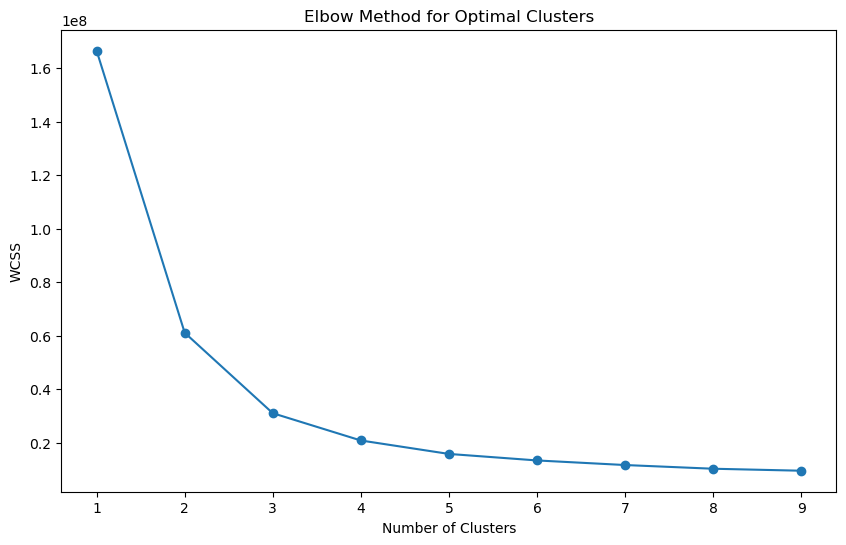

In [22]:
wcss = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=6, random_state=12)
clusters = kmeans.fit_predict(X)

In [24]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, clusters)
print(score)

0.3998234654695052


In [25]:
df2 = df.copy()
df2["cluster"] = clusters
df2.head()

,id,name,artists,year,popularity,valence,acousticness,danceability,energy,explicit,instrumentalness,key,loudness,mode,speechiness,tempo,cluster
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,0.0594,0.982,0.279,0.211,0,0.878000,10,-20.096,1,0.0366,80.954,5
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],1921,5,0.9630,0.732,0.819,0.341,0,0.000000,7,-12.441,1,0.4150,60.936,5
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,0.0394,0.961,0.328,0.166,0,0.913000,3,-14.850,1,0.0339,110.339,3
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],1921,3,0.1650,0.967,0.275,0.309,0,0.000028,5,-9.316,1,0.0354,100.109,1
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,0.2530,0.957,0.418,0.193,0,0.000002,3,-10.096,1,0.0380,101.665,1


In [26]:
df2['cluster'].value_counts().sort_index()

0    34302
1    36472
2    15695
3    36672
4    18575
5    28937
Name: cluster, dtype: int64

In [27]:
cluster_df = df2.groupby("cluster").agg("mean")
cluster_df["count"] = df2.groupby("cluster").size()
cluster_df = cluster_df[["count", "acousticness", "danceability", "energy", "instrumentalness", "loudness", "speechiness", "tempo", "valence"]]
cluster_df

C:\Users\khushi\AppData\Local\Temp\ipykernel_25216\3649566496.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_df = df2.groupby("cluster").agg("mean")


,count,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
cluster,,,,,,,,,
0,34302,0.449484,0.573674,0.521612,0.156630,-10.854448,0.088534,131.028729,0.551039
1,36472,0.491663,0.561571,0.489906,0.145819,-11.174896,0.099041,95.389406,0.531076
2,15695,0.442838,0.442575,0.539551,0.132643,-10.438465,0.123102,178.468910,0.565704
3,36672,0.495722,0.601572,0.494161,0.157816,-11.224760,0.085292,113.765712,0.572691
4,18575,0.370785,0.517985,0.590443,0.124613,-9.599217,0.089930,150.487940,0.567347
5,28937,0.702231,0.446478,0.311135,0.263528,-14.630932,0.117898,76.054593,0.397931


In [28]:
cluster_df.to_csv('./data/clusters_kmeans.csv')

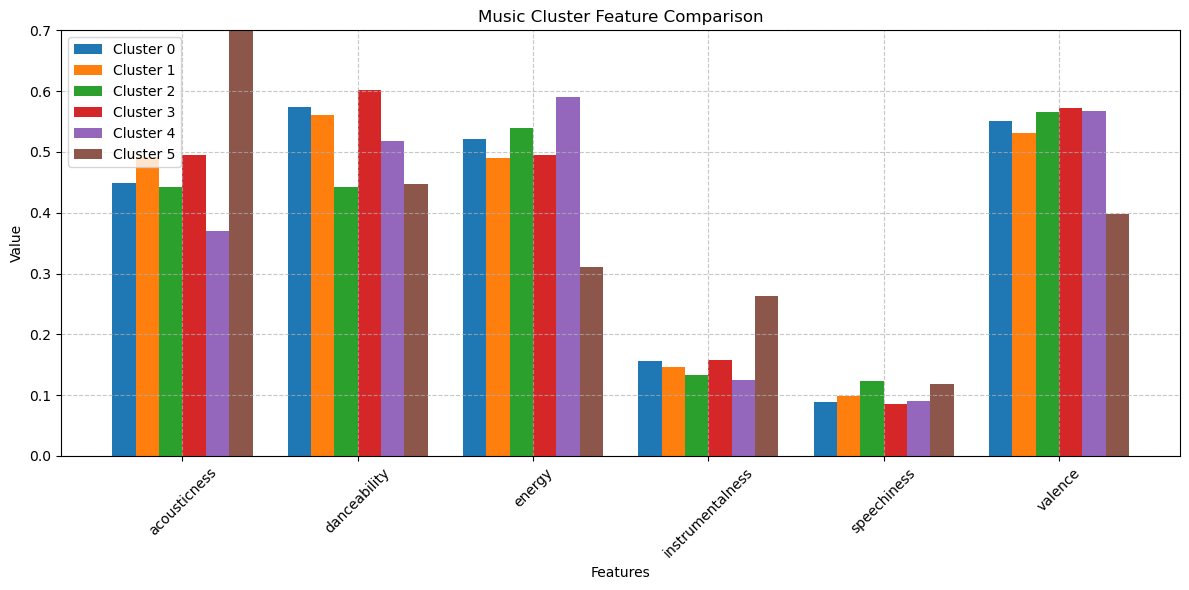

In [29]:
import numpy as np
import matplotlib.pyplot as plt

features = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
plot_data = cluster_df[features]

plt.figure(figsize=(12, 6))
x = np.arange(0, len(features) * 1.5, 1.5)
width = 0.2

for i in range(len(plot_data)):
    values = plot_data.iloc[i]
    plt.bar(x + i * width, values, width, label=f'Cluster {i}')

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Music Cluster Feature Comparison')
plt.xticks(x + width * (len(plot_data) - 1) / 2, features, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.ylim(0, 0.7)
plt.tight_layout()
plt.show()
